In [1]:
import numpy as np
import seaborn

import ginsim
import biolqm
import maboss
from itertools import combinations # for iterating over sets
import matplotlib.pyplot as plt # for modifying plots
import pandas as pd # for the visualization of lists of states
import pydot

import os

from tools import load_trajs, draw_graph_from_pandas, compute_circuits, compute_stg_counts

In [2]:
path = "../config/cell_cycle/boolean_network/"

In [3]:
bnd_file = path + "intracellular_model.bnd"
cfg_file = path + "intracellular_model.cfg"

masim = maboss.load(bnd_file, cfg_file)

<_io.TextIOWrapper name='/tmp/tmpb46h3kxx/tmppzi1mf56.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmpb46h3kxx/tmpt5rnc25g.cfg' mode='w' encoding='UTF-8'>
/tmp/tmpb46h3kxx
['MaBoSS_128n', '-c', '/tmp/tmpb46h3kxx/tmpt5rnc25g.cfg', '-o', '/tmp/tmpb46h3kxx/res', '/tmp/tmpb46h3kxx/tmppzi1mf56.bnd']
finish


/home/marco/anaconda3/envs/MaBoSS_env/lib/python3.9/site-packages/maboss/figures.py:86: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(plot_line, labels=plotting_labels, radius=1.2,


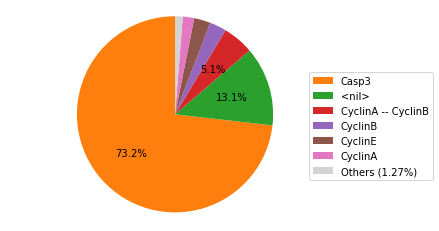

In [4]:
#Wild type

sim = masim.copy()

outputs = [ "Cdh1", "Cdc20"]

cyclins = ["CyclinA", "CyclinB", "CyclinE", "Casp3"]

sim.network.set_output(cyclins)

model = sim.run()

model.plot_piechart()

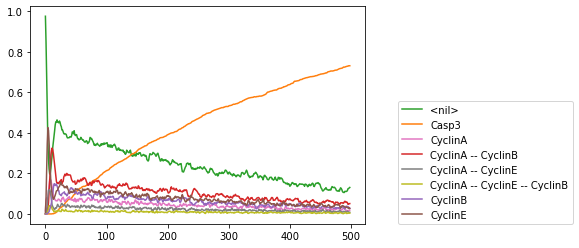

In [5]:
model.plot_trajectory()

In [25]:
## Discrete time
WT_phenotypes_discrete = sim.copy()
WT_phenotypes_discrete.update_parameters(time_tick=1, max_time=40, sample_count=100000)

In [26]:
%time res_discrete = WT_phenotypes_discrete.run()

<_io.TextIOWrapper name='/tmp/tmp4stf5_t_/tmptam2vx2v.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmp4stf5_t_/tmpl68n6v_5.cfg' mode='w' encoding='UTF-8'>
/tmp/tmp4stf5_t_
['MaBoSS_128n', '-c', '/tmp/tmp4stf5_t_/tmpl68n6v_5.cfg', '-o', '/tmp/tmp4stf5_t_/res', '/tmp/tmp4stf5_t_/tmptam2vx2v.bnd']
finish
CPU times: user 4.12 ms, sys: 4.13 ms, total: 8.24 ms
Wall time: 32.7 s


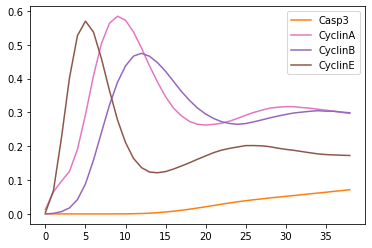

In [27]:
res_discrete.plot_node_trajectory()

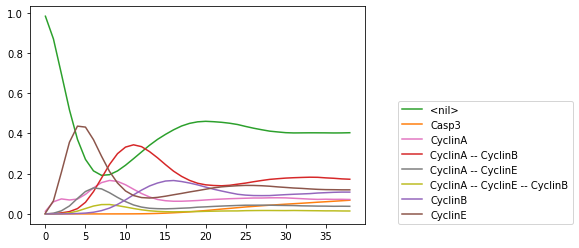

In [28]:
res_discrete.plot_trajectory()

# Analysis of the model for PhysiBoSS with phenotypes output

In [29]:
bnd_file = path + "intracellular_model.bnd"
cfg_file = path + "intracellular_model.cfg"

sim_phenotypes = maboss.load(bnd_file, cfg_file)

In [49]:
WT_phenotypes = sim_phenotypes.copy()
WT_phenotypes.update_parameters( time_tick=1, max_time=30)
WT_result = WT_phenotypes.run()

<_io.TextIOWrapper name='/tmp/tmplibdf99l/tmpawk0zr69.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmplibdf99l/tmpmwdjshak.cfg' mode='w' encoding='UTF-8'>
/tmp/tmplibdf99l
['MaBoSS_128n', '-c', '/tmp/tmplibdf99l/tmpmwdjshak.cfg', '-o', '/tmp/tmplibdf99l/res', '/tmp/tmplibdf99l/tmpawk0zr69.bnd']
finish


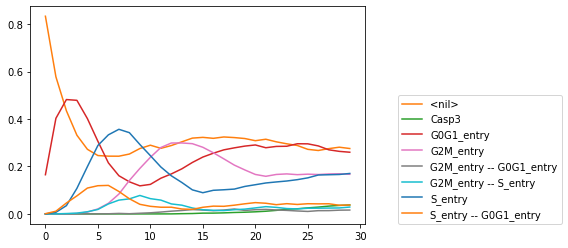

In [50]:
WT_result.plot_trajectory()

/home/marco/anaconda3/envs/MaBoSS_env/lib/python3.9/site-packages/maboss/figures.py:86: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(plot_line, labels=plotting_labels, radius=1.2,


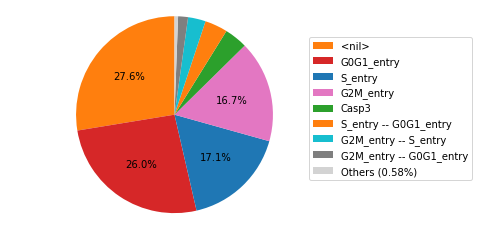

In [51]:
WT_result.plot_piechart()

<_io.TextIOWrapper name='/tmp/tmpho5i7xkt/tmp745dop9y.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmpho5i7xkt/tmphae3f461.cfg' mode='w' encoding='UTF-8'>
/tmp/tmpho5i7xkt
['MaBoSS_128n', '-c', '/tmp/tmpho5i7xkt/tmphae3f461.cfg', '-o', '/tmp/tmpho5i7xkt/res', '/tmp/tmpho5i7xkt/tmp745dop9y.bnd']
finish
CPU times: user 0 ns, sys: 7.85 ms, total: 7.85 ms
Wall time: 254 ms


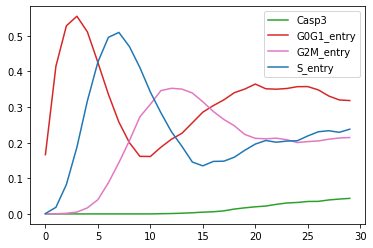

In [52]:
%time res = WT_phenotypes.run()
res.plot_node_trajectory()

In [95]:
## Discrete time
WT_phenotypes_discrete = WT_phenotypes.copy()
WT_phenotypes_discrete.update_parameters(discrete_time=1, time_tick=0.2, max_time=20)

cyclins = ["CyclinA", "CyclinB", "CyclinE", "CyclinD1"]

WT_phenotypes_discrete.network.set_output(cyclins)

In [33]:
%time res_discrete = WT_phenotypes_discrete.run()

<_io.TextIOWrapper name='/tmp/tmpcbn8f6ux/tmp16ps19td.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmpcbn8f6ux/tmp373r5i6c.cfg' mode='w' encoding='UTF-8'>
/tmp/tmpcbn8f6ux
['MaBoSS_128n', '-c', '/tmp/tmpcbn8f6ux/tmp373r5i6c.cfg', '-o', '/tmp/tmpcbn8f6ux/res', '/tmp/tmpcbn8f6ux/tmp16ps19td.bnd']
finish
CPU times: user 1.8 ms, sys: 4.69 ms, total: 6.48 ms
Wall time: 169 ms


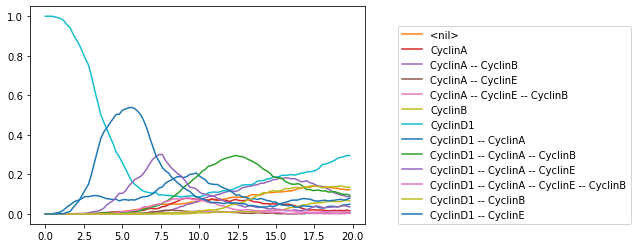

In [34]:
res_discrete.plot_trajectory()

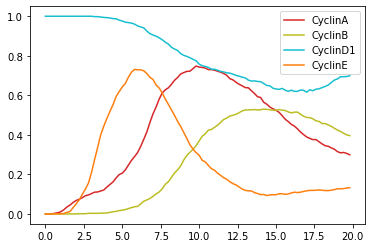

In [35]:
res_discrete.plot_node_trajectory()

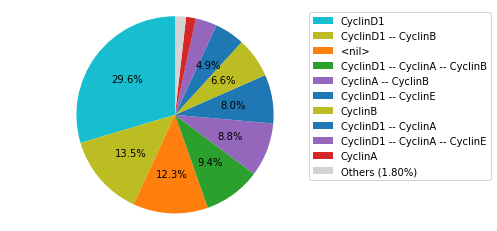

In [36]:
res_discrete.plot_piechart()

<_io.TextIOWrapper name='/tmp/tmpns48xc2f/tmpp8rhsl4a.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmpns48xc2f/tmpx8agh1_7.cfg' mode='w' encoding='UTF-8'>
/tmp/tmpns48xc2f
['MaBoSS_128n', '-c', '/tmp/tmpns48xc2f/tmpx8agh1_7.cfg', '-o', '/tmp/tmpns48xc2f/res', '/tmp/tmpns48xc2f/tmpp8rhsl4a.bnd']
finish
CPU times: user 4.58 ms, sys: 2.71 ms, total: 7.28 ms
Wall time: 162 ms


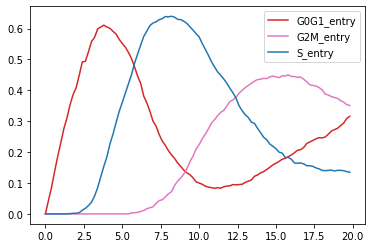

In [37]:
outputs_phenotype = ["G0G1_entry", "G2M_entry", "S_entry"]
WT_phenotypes_discrete.network.set_output(outputs_phenotype)

%time res_discrete = WT_phenotypes_discrete.run()
res_discrete.plot_node_trajectory()

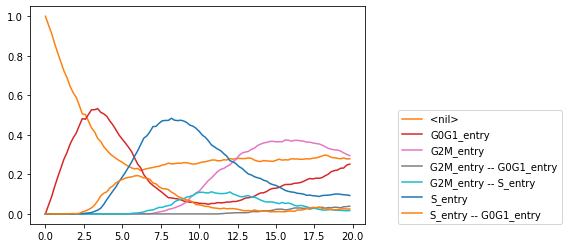

In [38]:
res_discrete.plot_trajectory()

In [39]:
WT_phenotypes_trajs = WT_phenotypes.copy()
WT_phenotypes_trajs.update_parameters(display_traj=1, thread_count=1)

In [40]:
%time res_trajs = WT_phenotypes_trajs.run()

<_io.TextIOWrapper name='/tmp/tmpcwvz2tgg/tmpz3sj6068.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmpcwvz2tgg/tmpd4iomn7w.cfg' mode='w' encoding='UTF-8'>
/tmp/tmpcwvz2tgg
['MaBoSS_128n', '-c', '/tmp/tmpcwvz2tgg/tmpd4iomn7w.cfg', '-o', '/tmp/tmpcwvz2tgg/res', '/tmp/tmpcwvz2tgg/tmpz3sj6068.bnd']
finish
CPU times: user 3.97 ms, sys: 49.4 ms, total: 53.4 ms
Wall time: 23.7 s


In [44]:
outputs = ["CyclinA", "CyclinB", "CyclinE", "CyclinD1"]
outputs_phenotype = ["G0G1_entry", "G2M_entry", "S_entry"]
trajs, all_states = load_trajs(res_trajs._path, outputs_phenotype, )
stg_counts, state_ids, ids_state = compute_stg_counts(trajs, all_states)

In [45]:
data = pd.DataFrame(
    data=stg_counts,
    index=state_ids.keys(), columns=state_ids.keys()
)
data

,<nil>,G0G1_entry,G0G1_entry -- G2M_entry,G0G1_entry -- S_entry,G2M_entry,G2M_entry -- S_entry,S_entry
<nil>,0.0,11260.0,0.0,0.0,0.0,0.0,0.0
G0G1_entry,3186.0,0.0,0.0,12453.0,0.0,0.0,0.0
G0G1_entry -- G2M_entry,0.0,4278.0,0.0,0.0,88.0,0.0,0.0
G0G1_entry -- S_entry,0.0,189.0,0.0,0.0,0.0,0.0,12252.0
G2M_entry,4275.0,0.0,4370.0,0.0,0.0,0.0,0.0
G2M_entry -- S_entry,0.0,0.0,0.0,0.0,8619.0,0.0,146.0
S_entry,3599.0,0.0,0.0,0.0,0.0,8771.0,0.0


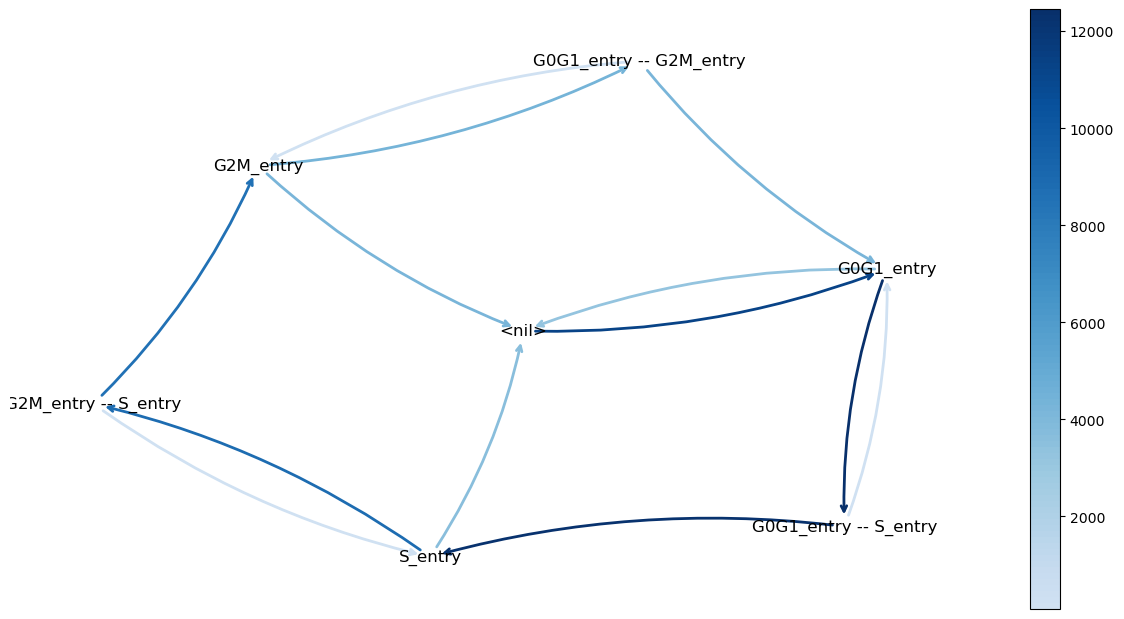

In [46]:
draw_graph_from_pandas(data)

In [47]:
probas = pd.DataFrame(
    data=np.divide(stg_counts,stg_counts.sum(axis=1)[:, np.newaxis]), 
    index=state_ids.keys(), columns=state_ids.keys()
)
probas

,<nil>,G0G1_entry,G0G1_entry -- G2M_entry,G0G1_entry -- S_entry,G2M_entry,G2M_entry -- S_entry,S_entry
<nil>,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
G0G1_entry,0.203721,0.000000,0.000000,0.796279,0.000000,0.000000,0.000000
G0G1_entry -- G2M_entry,0.000000,0.979844,0.000000,0.000000,0.020156,0.000000,0.000000
G0G1_entry -- S_entry,0.000000,0.015192,0.000000,0.000000,0.000000,0.000000,0.984808
G2M_entry,0.494505,0.000000,0.505495,0.000000,0.000000,0.000000,0.000000
G2M_entry -- S_entry,0.000000,0.000000,0.000000,0.000000,0.983343,0.000000,0.016657
S_entry,0.290946,0.000000,0.000000,0.000000,0.000000,0.709054,0.000000


In [48]:
%time paths_dict = compute_circuits(probas, ids_state, '<nil>', 0)

CPU times: user 938 µs, sys: 265 µs, total: 1.2 ms
Wall time: 1.24 ms


In [49]:
for proba in sorted(paths_dict, reverse=True):
    #if proba > 0.01:
    print("%.2f : %s" % (proba, paths_dict[proba]))

0.27 : ['<nil>', 'G0G1_entry', 'G0G1_entry -- S_entry', 'S_entry', 'G2M_entry -- S_entry', 'G2M_entry']
0.23 : ['<nil>', 'G0G1_entry', 'G0G1_entry -- S_entry', 'S_entry']
0.20 : ['<nil>', 'G0G1_entry']


<_io.TextIOWrapper name='/tmp/tmp1_ab2e4e/tmp5t6fubaf.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmp1_ab2e4e/tmp1976lqb9.cfg' mode='w' encoding='UTF-8'>
/tmp/tmp1_ab2e4e
['MaBoSS_128n', '-c', '/tmp/tmp1_ab2e4e/tmp1976lqb9.cfg', '-o', '/tmp/tmp1_ab2e4e/res', '/tmp/tmp1_ab2e4e/tmp5t6fubaf.bnd']
finish


Text(0.5, 1.0, 'Plk1 mutant')

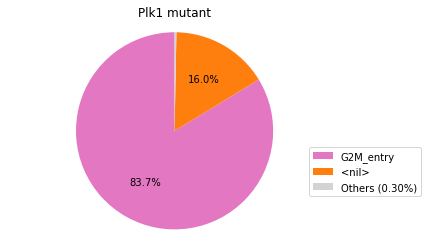

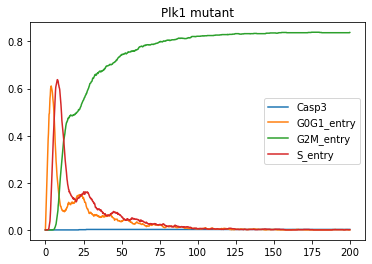

In [59]:
mut_Plk1_OFF = WT_phenotypes_discrete.copy()

outputs_phenotype = ["G0G1_entry", "G2M_entry", "S_entry", "Casp3"]
mut_Plk1_OFF.network.set_output(outputs_phenotype)
mut_Plk1_OFF.update_parameters(max_time=200)
mut_Plk1_OFF.mutate("Plk1", "OFF")
mutres_Plk1_OFF = mut_Plk1_OFF.run()
mutres_Plk1_OFF.plot_piechart()
plt.title('Plk1 mutant')
mutres_Plk1_OFF.get_nodes_probtraj().plot(legend=True)
plt.title('Plk1 mutant')

<_io.TextIOWrapper name='/tmp/tmpn3dls6go/tmpi2ppjadn.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmpn3dls6go/tmpvmv5688o.cfg' mode='w' encoding='UTF-8'>
/tmp/tmpn3dls6go
['MaBoSS_128n', '-c', '/tmp/tmpn3dls6go/tmpvmv5688o.cfg', '-o', '/tmp/tmpn3dls6go/res', '/tmp/tmpn3dls6go/tmpi2ppjadn.bnd']
finish


Text(0.5, 1.0, 'PI3K mutant')

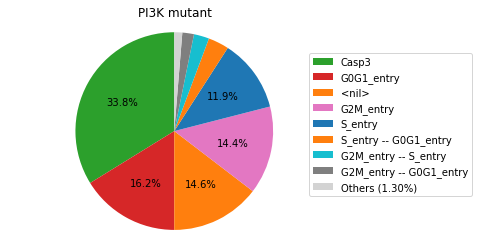

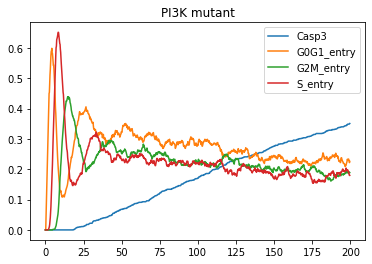

In [60]:
mut_PI3K_ON = WT_phenotypes_discrete.copy()

outputs_phenotype = ["G0G1_entry", "G2M_entry", "S_entry", "Casp3"]
mut_PI3K_ON.network.set_output(outputs_phenotype)
mut_PI3K_ON.update_parameters(max_time=200)
mut_PI3K_ON.mutate("PI3K_H", "ON")
mutres_PI3K_ON = mut_PI3K_ON.run()
mutres_PI3K_ON.plot_piechart()
plt.title('PI3K mutant')
mutres_PI3K_ON.get_nodes_probtraj().plot(legend=True)
plt.title('PI3K mutant')

<_io.TextIOWrapper name='/tmp/tmptwa8_tsm/tmp2qtjk373.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmptwa8_tsm/tmp5e__g0aj.cfg' mode='w' encoding='UTF-8'>
/tmp/tmptwa8_tsm
['MaBoSS_128n', '-c', '/tmp/tmptwa8_tsm/tmp5e__g0aj.cfg', '-o', '/tmp/tmptwa8_tsm/res', '/tmp/tmptwa8_tsm/tmp2qtjk373.bnd']
finish


Text(0.5, 1.0, 'PI3K and p110 mutant')

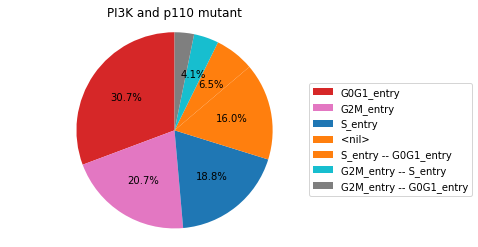

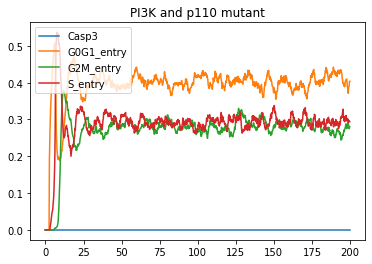

In [53]:
mut_PI3K_p110_ON = mut_PI3K_ON.copy()
mut_PI3K_p110_ON.mutate("p110_H", "ON")
mutres_PI3K_p110_ON = mut_PI3K_p110_ON.run()
mutres_PI3K_p110_ON.plot_piechart()
plt.title('PI3K and p110 mutant')
mutres_PI3K_p110_ON.get_nodes_probtraj().plot(legend=True)
plt.title('PI3K and p110 mutant')

<_io.TextIOWrapper name='/tmp/tmpmso1iqsk/tmpda9_ysqn.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmpmso1iqsk/tmp52vlgrni.cfg' mode='w' encoding='UTF-8'>
/tmp/tmpmso1iqsk
['MaBoSS_128n', '-c', '/tmp/tmpmso1iqsk/tmp52vlgrni.cfg', '-o', '/tmp/tmpmso1iqsk/res', '/tmp/tmpmso1iqsk/tmpda9_ysqn.bnd']
finish


Text(0.5, 1.0, 'FoxO3 mutant')

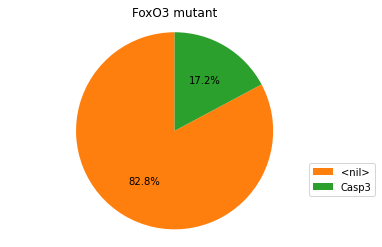

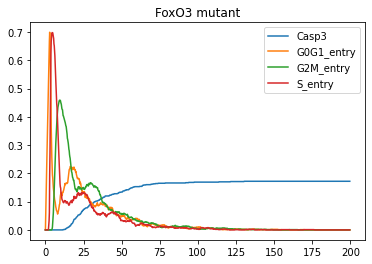

In [55]:
mut_FoxO3_OFF = WT_phenotypes_discrete.copy()

outputs_phenotype = ["G0G1_entry", "G2M_entry", "S_entry", "Casp3"]
mut_FoxO3_OFF.network.set_output(outputs_phenotype)
mut_FoxO3_OFF.update_parameters(max_time=200)
mut_FoxO3_OFF.mutate("FoxO3", "OFF")
mutres_FoxO3_OFF = mut_FoxO3_OFF.run()
mutres_FoxO3_OFF.plot_piechart()
plt.title('FoxO3 mutant')
mutres_FoxO3_OFF.get_nodes_probtraj().plot(legend=True)
plt.title('FoxO3 mutant')